## K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../../datascience/data/diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], random_state=67)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)

## Evaluation Matrics

In [10]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, plot_confusion_matrix

In [11]:
accuracy_score(y_train, y_train_pred)

0.8315972222222222

In [12]:
recall_score(y_train, y_train_pred)

0.6802030456852792

In [13]:
precision_score(y_train, y_train_pred)

0.7976190476190477

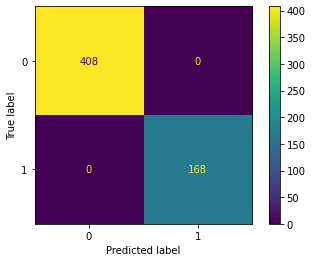

In [14]:
plot_confusion_matrix(knn, X_train, y_train_pred)

In [15]:
k_list = [3,5,9,12]
metrics_dict = dict()

metrics = (accuracy_score, recall_score, precision_score, f1_score)

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    
    for m in metrics:
        metrics_dict.setdefault(m.__name__,[]).append(m(y_train, y_train_pred))


In [16]:
df_metrics = pd.DataFrame(metrics_dict)
df_metrics

,accuracy_score,recall_score,precision_score,f1_score
0,0.866319,0.746193,0.844828,0.792453
1,0.831597,0.680203,0.797619,0.734247
2,0.793403,0.614213,0.737805,0.670360
3,0.791667,0.553299,0.773050,0.644970


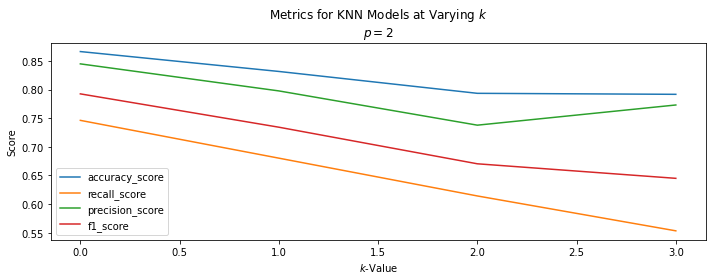

In [373]:
fig, ax = plt.subplots()

ax.plot(df_metrics)
fig.set_figwidth(10,10)
ax.set(
    title='Metrics for KNN Models at Varying $k$\n$p=2$',
    xlabel='$k$-Value',
    ylabel='Score'
    )
ax.legend(df_metrics.columns)
fig.tight_layout()